In [414]:
# in this notebook,  I will try to fit a model relating the mean behavior of L4,  L2/3,  SST and VIP cells


In [415]:
# load the data

In [963]:

import sys
sys.path
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan')
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/OASIS-master')

%matplotlib inline


import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import elementwise_grad as egrad
from autograd import grad
from autograd import jacobian
from autograd import hessian
import size_contrast_analysis as sca
import scipy.stats as sst
import sim_utils
from importlib import reload
reload(sim_utils)
import calnet.utils
import calnet.fitting_spatial_feature_model
import opto_utils
import nub_utils
import scipy.interpolate as sip
from numpy import maximum as npmaximum
import size_contrast_figures as scf
import scipy.signal as ssi

from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kstest
from scipy import stats



reload(scf)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [417]:
reload(opto_utils)

<module 'opto_utils' from '/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/opto_utils.py'>

In [418]:
# inp = [[1,  2,  3],  [4,  5,  6]]
shp = (1,  2,  3,  4,  5)
inp = np.arange(np.prod(shp)).reshape(shp).tolist()

In [419]:
reload(ut)
outp = ut.apply_fn_to_nested_lists_single_out(lambda x: x,  [None,  None],  inp)

In [420]:
reload(scf)
reload(ut)
data_path='/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/data'
rsfile = data_path+'/celltype_rate_summary_exptwise_200828.npy'
ca_obj = scf.ca_imaging(rsfile)

In [421]:
npyfile = np.load(rsfile,allow_pickle=True)[()]
print(npyfile.keys())
print(len(npyfile['rs']))
print(len(npyfile['rs'][0]))
print(len(npyfile['rs'][0][0]))
print(npyfile['rs'][1][0][1].shape)

dict_keys(['rs', 'rs_sem', 'roi_ids', 'expt_ids'])
2
5
2
(3535, 6, 6, 8)


In [422]:
self_test = scf.ca_imaging(rsfile)
print(self_test.running_dim)
print(self_test.celltype_dim)
print(self_test.alignment_dim)





0
1
2


In [423]:
ca_obj.compute_scis()

In [424]:
ca_obj.compute_c50s()

In [425]:
ca_obj.compute_csis()

/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:793: RuntimeWarning: All-NaN slice encountered
  return this_data[:,:,1]/np.nanmax(this_data,2)


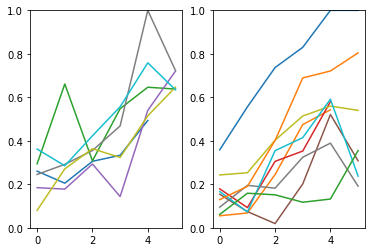

In [426]:
plt.figure()
for itype in range(2):
    plt.subplot(1,  2,  itype+1)
    plt.plot(ca_obj.csis[0][itype][0].T)
    plt.ylim((0,  1))

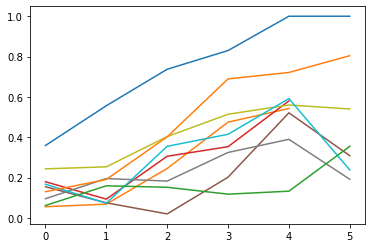

In [427]:
plt.plot(ca_obj.csis[0][itype][0].T);
plt.show()

In [428]:
ca_obj.csis[0][itype][0].T

array([[       nan, 0.05527929,        nan, 0.17918857,        nan,
        0.15444057,        nan, 0.09493783, 0.24311842, 0.166805  ,
        0.35873976, 0.12963965, 0.06140851],
       [       nan, 0.06806858,        nan, 0.0928925 ,        nan,
        0.07452642,        nan, 0.19497433, 0.25316093, 0.07276234,
        0.55618718, 0.19049206, 0.15900294],
       [       nan, 0.24486728,        nan, 0.30558408,        nan,
        0.01958687,        nan, 0.1823947 , 0.40293686, 0.35476608,
        0.73700119, 0.40175338, 0.15171703],
       [       nan, 0.47480878,        nan, 0.35296331,        nan,
        0.2017117 ,        nan, 0.32445106, 0.51386832, 0.41457672,
        0.82993625, 0.68927952, 0.11759028],
       [       nan, 0.54238783,        nan, 0.58013164,        nan,
        0.5210044 ,        nan, 0.3894113 , 0.55984251, 0.59142864,
        1.        , 0.72119848, 0.13228971],
       [       nan,        nan,        nan,        nan,        nan,
        0.30828823,        

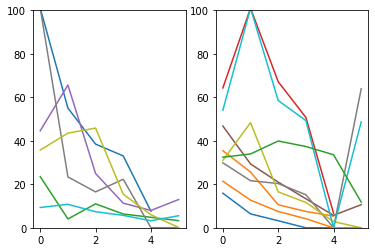

In [429]:
plt.figure()
for itype in range(2):
    plt.subplot(1,  2,  itype+1)
    plt.plot(ca_obj.c50s[0][itype][0].T)
    plt.ylim((0,  100))

In [430]:
reload(scf)
ca_obj2 = scf.ca_imaging(rsfile)

/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/opto_utils.py:316: RuntimeWarning: Mean of empty slice
  rs_ori = np.nanmean(rs_ori,idim) #np.nanmean(rs_ori,1)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:654: RuntimeWarning: Mean of empty slice
  rsexpt[iexpt] = np.nanmean(rso[expt_ids==iexpt],0)


In [431]:
# ca_obj.fit_ayaz_models()

In [432]:
ca_obj2.compute_c50s()

/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:746: RuntimeWarning: Mean of empty slice
  this_data = np.nanmean(data,2)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:747: RuntimeWarning: Mean of empty slice
  this_sem = np.nanmean(data,2)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:748: RuntimeWarning: Mean of empty slice
  this_data[:,0] = np.nanmean(this_data[:,0])


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/opto_utils.py:316: RuntimeWarning: Mean of empty slice
  rs_ori = np.nanmean(rs_ori,idim) #np.nanmean(rs_ori,1)


[[[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]], [[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]]]
length of ind_list = 3
length of ind_list = 2
length of ind_list = 1
length of ind_list = 0
2.5290093590772433
length of ind_list = 0
2.2049598702846227
length of ind_list = 1
length of ind_list = 0
3.098279979464226


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:655: RuntimeWarning: Mean of empty slice
  return rsexpt
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/pyute.py:142: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape


length of ind_list = 0
2.7435670231506393
length of ind_list = 1
length of ind_list = 0
3.9143609068896055
length of ind_list = 0
4.983392668794143


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape


length of ind_list = 1
length of ind_list = 0
0.9182298642931612
length of ind_list = 0
0.9344238221318399
length of ind_list = 1
length of ind_list = 0
2.0100417565227082
length of ind_list = 0
2.0495240765738276


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:699: RuntimeWarning: Mean of empty slice
  shp = to_plot.shape


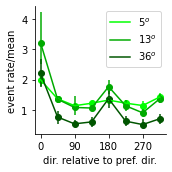

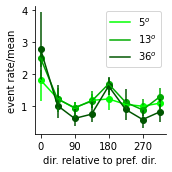

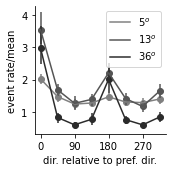

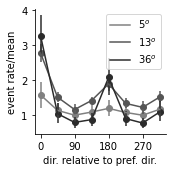

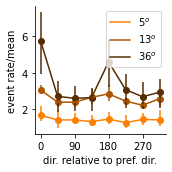

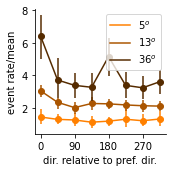

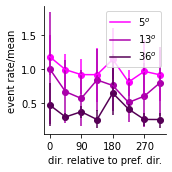

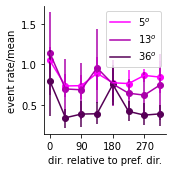

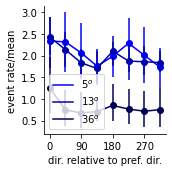

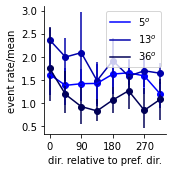

In [985]:
        reload(scf)
        reload(ut)
        ca_obj2 = scf.ca_imaging(rsfile)
        self = ca_obj2
        opt = {}
        opt['filebase'] = 'figures/%s_ori_tuning_by_size_full_contrast_%s.eps'
        opt['rsexpt_inds'] = [1, 2]#(lbls[itype],  alignment_lbls[ialign])
        opt['ind_list'] = [[0], None, None]
        opt['fn'] = self.plot_ori_by_size
        opt['attr_args'] = ['rsexpt', 'rsexpt_colors_for_2d']
        opt['add_kwargs'] = {}
        scf.fig_gen(opt, self, save=False)

In [986]:
def filter_dir(arr, kappa=0.5):
    kappa_arr = np.arange(-2, 3)
    kappa_arr = kappa**np.abs(kappa_arr)
    kappa_arr = kappa_arr/kappa_arr.sum()
    arr_wrap = np.concatenate((arr[-2:], arr, arr[:2]))
    return ssi.convolve(kappa_arr,  arr_wrap,  mode='valid')
signal = 1+np.cos(np.arange(8)/8*2*np.pi)
signal_filt = filter_dir(signal, kappa=0.5)

In [987]:
plt.figure()
irun = 0
itype = 1
ialign = 0
pc_arr = np.nanmean(self.rsexpt[irun][itype][ialign],  0)[:,  -1,  :]
itype = 2
sst_arr = self.rsexpt[irun][itype][ialign][:,  :,  -1,  :]
opt_kappa = np.nan*np.ones(sst_arr.shape[:2])
def cost_(kappa, xdata, ydata):
    return np.sum((ydata - filter_dir(xdata, kappa))**2)
for iexpt in range(sst_arr.shape[0]):
    for isize in range(sst_arr.shape[1]):
        if not np.all(np.isnan(sst_arr[iexpt, isize, :])):
            def this_cost(kappa):
                return cost_(kappa, pc_arr[isize]/pc_arr[isize].mean(), sst_arr[iexpt, isize]/sst_arr[iexpt, isize].mean())
            result = sop.minimize(this_cost, 0.5, bounds=[(0, 1)])
            opt_kappa[iexpt, isize] = result['x']


<Figure size 432x288 with 0 Axes>

In [441]:
from autograd.scipy import signal as ss

In [990]:
reload(scf)
self = scf.ca_imaging(rsfile)
exptwise = False
norm_to_max = True
big_ind=-1
self.compute_smis(exptwise=exptwise, xaxis=self.ucontrast, norm_to_max=norm_to_max,big_ind=big_ind)
self.compute_csis(exptwise=exptwise, xaxis=self.usize, norm_to_max=norm_to_max)

irun, itype, ialign = 0, 1, 0
self.smis[0][0][0].shape
# scis_expt = scf.average_expt_means(self.expt_ids[irun][itype][ialign], self.scis[irun][itype][ialign], self.nexpt[irun][itype][ialign])
# csis_expt = scf.average_expt_means(self.expt_ids[irun][itype][ialign], self.csis[irun][itype][ialign], self.nexpt[irun][itype][ialign])

/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/opto_utils.py:316: RuntimeWarning: Mean of empty slice
  rs_ori = np.nanmean(rs_ori,idim) #np.nanmean(rs_ori,1)


[[[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]], [[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]]]
[[[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]], [[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]]]


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:655: RuntimeWarning: Mean of empty slice
  return rsexpt
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:778: RuntimeWarning: Mean of empty slice
  else:
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:788: RuntimeWarning: invalid value encountered in true_divide
  
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:783: RuntimeWarning: All-NaN slice encountered
  return to_return
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:788: RuntimeWarning: All-NaN slice encountered
  


[[[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]], [[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]]]


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:794: RuntimeWarning: All-NaN slice encountered
  
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:794: RuntimeWarning: invalid value encountered in true_divide
  


(10, 6)

### We get the SMI per cell for all neurons

In [991]:

def mi_preprocess(data,subtract_min=True,avg_last=True):
    if avg_last:
        to_return = np.nanmean(data,-1)
    else:
        to_return = data
    #to_return = to_return - np.nanmean(to_return[:,:,0],1)[:,np.newaxis,np.newaxis]
    if subtract_min:
        to_return = to_return - np.nanmin(np.nanmin(to_return,1),1)[:,np.newaxis,np.newaxis]
    return to_return

def smi_fn(data,subtract_min=True,avg_last=True, big_ind=-1):
    this_data = mi_preprocess(data,subtract_min=subtract_min,avg_last=avg_last)#[:,:,first_ind:last_ind+1]
    return this_data[:,big_ind,:]/np.nanmax(this_data,1)

def csi_fn(data,subtract_min=True,avg_last=True):
    this_data = mi_preprocess(data,subtract_min=subtract_min,avg_last=avg_last)#[:,:,first_ind:last_ind+1]
    #return this_data[:,:,1]/this_data[:,:,-1]
    #return this_data[:,:,2]/np.nanmax(this_data,2)
    return this_data[:,:,1]/np.nanmax(this_data,2)

this_data = self.rso

my_smi_fn = lambda *args: smi_fn(*args, big_ind=big_ind)
my_smi_fn_x = lambda x: my_smi_fn(x)
smi = ut.apply_fn_to_nested_list(my_smi_fn_x,[None,None,None],this_data)

my_csi_fn = csi_fn
my_csi_fn_x = lambda x: my_csi_fn(x)
cis = ut.apply_fn_to_nested_list(my_csi_fn_x,[None,None,None],this_data)

# cis = self.avg_by_expt(mis)


/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: All-NaN slice encountered
  return f_raw(*args, **kwargs)
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [996]:
smi[0][0][0].shape

(7599, 6)

In [1106]:

batches_size=[]
for l in range(2):
    which_sesh=np.unique(self.expt_ids[0][l][0])
    for k in range(int(np.max(which_sesh)+1)):
        this_batch=int(np.floor(np.sum(self.expt_ids[0][l][0]==int(k))))
        if this_batch>0:
            batches_size.append(this_batch)

batch_size=int(np.min(batches_size))


def compute_surrogate_cis_mis(self,cell_type_ind,mis_cis_mat,batch_size):

    which_sesh=np.unique(self.expt_ids[0][cell_type_ind][0])
    mis_cis_surrogate=[]
    for k in range(int(np.max(which_sesh)+1)):
        aux= mis_cis_mat[0][cell_type_ind][0][self.expt_ids[0][cell_type_ind][0]==int(k),:]
        n_batches=int(np.floor(np.sum(self.expt_ids[0][cell_type_ind][0]==int(k))/batch_size))
        for s in range(n_batches):
            neuron_choice=np.random.choice(np.arange(0, np.sum(self.expt_ids[0][cell_type_ind][0]==int(k))),batch_size);
            mis_cis_surrogate.append(np.nanmean(aux[neuron_choice,:],axis=0))
    return mis_cis_surrogate


smis_surrogate_l23=compute_surrogate_cis_mis(self=self,cell_type_ind=1,mis_cis_mat=smi,batch_size=batch_size)
smis_surrogate_l4=compute_surrogate_cis_mis(self=self,cell_type_ind=0,mis_cis_mat=smi,batch_size=batch_size)

ciss_surrogate_l23=compute_surrogate_cis_mis(self=self,cell_type_ind=1,mis_cis_mat=cis,batch_size=batch_size)
ciss_surrogate_l4=compute_surrogate_cis_mis(self=self,cell_type_ind=0,mis_cis_mat=cis,batch_size=batch_size)

/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


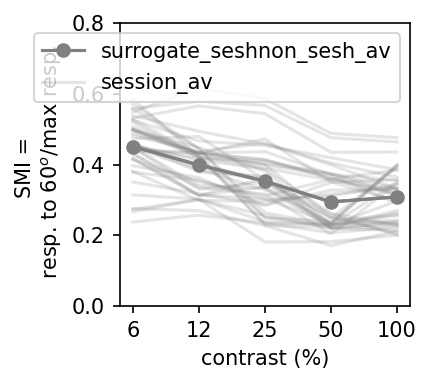

In [1107]:
alpha=0.5
colors=self.rsexpt_colors
plt.figure(figsize=(2.5,2.5),dpi=150)
plt.ylim([0,0.8])

def plot_mean_std(thisarray, this_color):
    plt.plot(np.nanmean(thisarray,axis=0)[1:]+np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);
    plt.plot(np.nanmean(thisarray,axis=0)-np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);

def plor_errorbar(thisarray, this_color):
    plt.errorbar(np.linspace(0,4,5),np.nanmean(thisarray,axis=0)[1:],np.nanstd(thisarray,axis=0)[1:]/np.sqrt(thisarray.shape[0]),color=this_color);

plt.plot(np.nanmean(smis_surrogate_l23,axis=0)[1:],'o-',color=colors[0][1][0]);
# plt.plot(np.nanmean(self.avg_by_expt(mis)[0][1][0],axis=0)[1:],'--',color=colors[0][1][0]);
plt.plot(np.array(smis_surrogate_l23).T[1:],color=colors[0][1][0],alpha=0.2);

plor_errorbar(np.array(smis_surrogate_l23), colors[0][1][0])

plt.legend(['surrogate_sesh''non_sesh_av' ,'session_av']);

plt.xticks(np.arange(0,len(self.ucontrast)-1),self.ucontrast[1:])
plt.ylabel('SMI = \n resp. to 60$^o$/max resp.')
plt.xlabel('contrast (%)')

plt.savefig('figures/SMI_l23_neuron_groups.pdf',dpi=300)

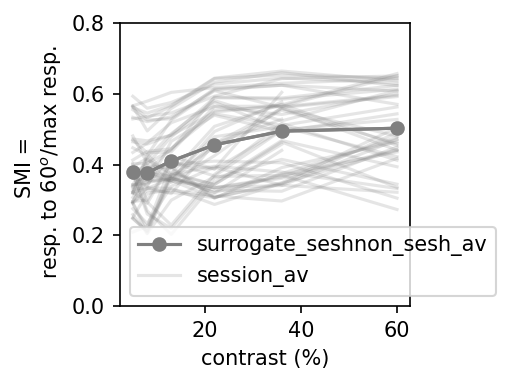

In [1108]:
alpha=0.5
colors=self.rsexpt_colors
plt.figure(figsize=(2.5,2.5),dpi=150)
plt.ylim([0,0.8])

def plot_mean_std_cis(thisarray, this_color):
    plt.plot(self.usize,np.nanmean(thisarray,axis=0)+np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);
    plt.plot(self.usize,np.nanmean(thisarray,axis=0)-np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);

def plor_errorbar_cis(thisarray, this_color):
    plt.errorbar(self.usize,np.nanmean(thisarray,axis=0),np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);

plt.plot(self.usize,np.nanmean(ciss_surrogate_l23,axis=0),'o-',color=colors[0][1][0]);
# plt.plot(np.nanmean(self.avg_by_expt(mis)[0][1][0],axis=0)[1:],'--',color=colors[0][1][0]);
plt.plot(self.usize,np.array(ciss_surrogate_l23).T,color=colors[0][1][0],alpha=0.2);

plor_errorbar_cis(np.array(ciss_surrogate_l23), colors[0][1][0])

plt.legend(['surrogate_sesh''non_sesh_av' ,'session_av']);

plt.ylabel('SMI = \n resp. to 60$^o$/max resp.')
plt.xlabel('contrast (%)')

plt.savefig('figures/SMI_l23_neuron_groups.pdf',dpi=300)

[[[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]], [[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]]]
[[[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]], [[10, 10], [13, 13], [10, 10], [13, 13], [7, 7]]]
[0.000792484503335772, 4.101808967043141e-05, 0.09653282524961415, 0.0011580030242273232, 0.3135765261982675]
[0.406701029676119, 0.41141594343968924, 0.8634519004094006, 0.7732811885067078, 0.4000159243625996]


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:655: RuntimeWarning: Mean of empty slice
  return rsexpt
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:655: RuntimeWarning: Mean of empty slice
  return rsexpt


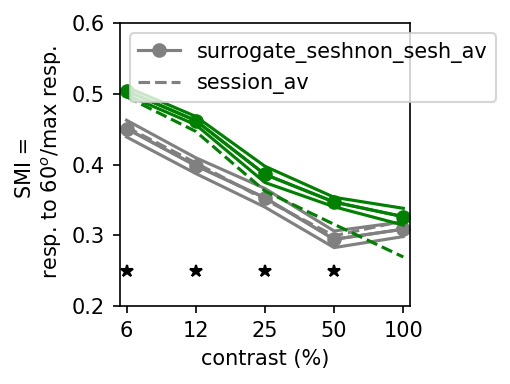

In [1109]:
alpha=0.5
colors=self.rsexpt_colors
plt.figure(figsize=(2.5,2.5),dpi=150)
plt.ylim([0.2,0.6])

def plot_mean_std(thisarray, this_color):
    plt.plot(np.nanmean(thisarray,axis=0)[1:]+np.nanstd(thisarray,axis=0)[1:]/np.sqrt(thisarray.shape[0]),color=this_color);
    plt.plot(np.nanmean(thisarray,axis=0)[1:]-np.nanstd(thisarray,axis=0)[1:]/np.sqrt(thisarray.shape[0]),color=this_color);

def plor_errorbar(thisarray, this_color):
    plt.errorbar(np.linspace(0,4,5),np.nanmean(thisarray,axis=0)[1:]+np.nanstd(thisarray,axis=0)[1:]/np.sqrt(thisarray.shape[0]),color=this_color);

plt.plot(np.nanmean(smis_surrogate_l23,axis=0)[1:],'o-',color=colors[0][1][0]);
plt.plot(np.nanmean(self.avg_by_expt(mis)[0][1][0],axis=0)[1:],'--',color=colors[0][1][0]);
plt.plot(np.nanmean(smis_surrogate_l23,axis=0)[1:],'*-',color=colors[0][1][0]);

plot_mean_std(np.array(smis_surrogate_l23), colors[0][1][0])

plt.legend(['surrogate_sesh''non_sesh_av' ,'session_av']);


plt.plot(np.nanmean(smis_surrogate_l4,axis=0)[1:],'o-',color=colors[0][0][0]);
plt.plot(np.nanmean(self.avg_by_expt(mis)[0][0][0],axis=0)[1:],'--',color=colors[0][0][0]);
plt.plot(np.nanmean(smis_surrogate_l4,axis=0)[1:],'*-',color=colors[0][0][0]);


plot_mean_std(np.array(smis_surrogate_l4), colors[0][0][0])


## These sims lists are locomotion x celltype x alignement (center or surround) x 
smi_l23_sesh_av=list(self.smis[0][1][0])
smi_l4_sesh_av=list(self.smis[0][0][0])

smi_l23_surr=list(smis_surrogate_l23)
smi_l4_surr=list(smis_surrogate_l4)

p_value_SMI_sesh_av=[]
p_value_SMI_surr=[]

for k in range(1,int(len(self.ucontrast))):

    x=np.array(smi_l23_sesh_av)[:,k]
    x=x[~np.isnan(x)]
    y=np.array(smi_l4_sesh_av)[:,k]
    y=y[~np.isnan(y)]
    this_test=stats.ttest_ind(x, y)
    
    p_value_SMI_sesh_av.append(this_test.pvalue)

    x=np.array(smi_l23_surr)[:,k]
    x=x[~np.isnan(x)]
    y=np.array(smi_l4_surr)[:,k]
    y=y[~np.isnan(y)]
    this_test=stats.ttest_ind(x, y)
    p_value_SMI_surr.append(this_test.pvalue)

# red = wilcoxon(smi_l23)
print(p_value_SMI_surr)
print(p_value_SMI_sesh_av)


plt.plot((np.array(p_value_SMI_surr)<0.1)*0.25,'*k');

plt.xticks(np.arange(0,len(self.ucontrast)-1),self.ucontrast[1:])
plt.ylabel('SMI = \n resp. to 60$^o$/max resp.')
plt.xlabel('contrast (%)')
plt.xlim([-0.10 ,4.1])

plt.savefig('figures/SMI_l23vsl4.pdf',dpi=300)

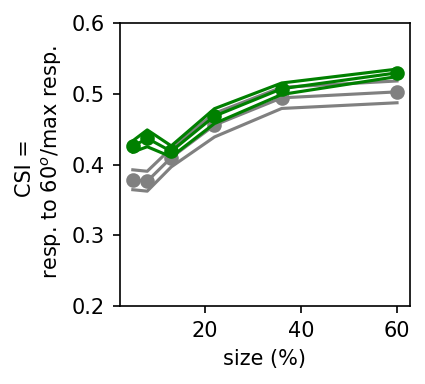

In [1113]:
alpha=0.5
colors=self.rsexpt_colors
plt.figure(figsize=(2.5,2.5),dpi=150)
plt.ylim([0.2,0.6])


def plot_mean_std_csi(thisarray, this_color):
    plt.plot(self.usize,np.nanmean(thisarray,axis=0)+np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);
    plt.plot(self.usize,np.nanmean(thisarray,axis=0)-np.nanstd(thisarray,axis=0)/np.sqrt(thisarray.shape[0]),color=this_color);

plt.plot(self.usize,np.nanmean(ciss_surrogate_l23,axis=0),'o-',color=colors[0][1][0]);
plot_mean_std_csi(np.array(ciss_surrogate_l23), colors[0][1][0])


plt.plot(self.usize,np.nanmean(ciss_surrogate_l4,axis=0),'o-',color=colors[0][0][0]);
plot_mean_std_csi(np.array(ciss_surrogate_l4), colors[0][0][0])

plt.ylabel('CSI = \n resp. to 60$^o$/max resp.')
plt.xlabel('size (%)')



## These sims lists are locomotion x celltype x alignement (center or surround) x 
cis_l23_sesh_av=list(self.csis[0][1][0])
cis_l4_sesh_av=list(self.csis[0][0][0])

cis_l23_surr=list(ciss_surrogate_l23)
cis_l4_surr=list(ciss_surrogate_l4)

p_value_CSI_sesh_av=[]
p_value_CSI_surr=[]

for k in range(1,int(len(self.ucontrast))):

    x=np.array(cis_l23_sesh_av)[:,k]
    x=x[~np.isnan(x)]
    y=np.array(cis_l4_sesh_av)[:,k]
    y=y[~np.isnan(y)]
    this_test=stats.ttest_ind(x, y)
    
    p_value_CSI_sesh_av.append(this_test.pvalue)

    x=np.array(smi_l23_surr)[:,k]
    x=x[~np.isnan(x)]
    y=np.array(smi_l4_surr)[:,k]
    y=y[~np.isnan(y)]
    this_test=stats.ttest_ind(x, y)
    p_value_CSI_surr.append(this_test.pvalue)

# red = wilcoxon(smi_l23)
print(p_value_CSI_surr)
print(p_value_CSI_sesh_av)


plt.plot((np.array(p_value_SMI_surr)<0.1)*0.25,'*k');


plt.savefig('figures/CSI_l23vsl4.pdf',dpi=300)

# We want to know if SMI of L4 is significantly different from L23

In [726]:
np.max(which_sesh)+1

13.0

In [785]:
which_sesh=np.unique(self.expt_ids[0][0][0])
print(which_sesh)

for k in range(int(np.max(which_sesh)+1)):
    print(sum(self.expt_ids[0][0][0]==int(k)))

[0. 2. 4. 7. 8. 9.]
1319
0
1765
0
164
0
0
1058
1058
2235


In [691]:
self.smis[0][1][0]

array([[       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [0.57774033, 0.57507237, 0.59680839, 0.58134027, 0.48317801,
        0.47027326],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [0.4065914 , 0.38011156, 0.32611418, 0.28453155, 0.33421764,
        0.35109587],
       [0.29363122, 0.4385594 , 0.32423495, 0.33391083, 0.23401881,
        0.38102225],
       [0.34196121, 0.27273473, 0.28548692, 0.21845631, 0.19949064,
        0.2261666 ],
       [0.53241635, 0.45461966, 0.40405419, 0.35481335, 0.22539104,
        0.21155472],
       [0.65922045, 0

## Plot the SMI vs contrast

/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/opto_utils.py:316: RuntimeWarning: Mean of empty slice
  rs_ori = np.nanmean(rs_ori,idim) #np.nanmean(rs_ori,1)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:654: RuntimeWarning: Mean of empty slice
  rsexpt[iexpt] = np.nanmean(rso[expt_ids==iexpt],0)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:777: RuntimeWarning: Mean of empty slice
  to_return = np.nanmean(data,-1)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:787: RuntimeWarning: invalid value encountered in true_divide
  return this_data[:,big_ind,:]/np.nanmax(this_data,1)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/size_contrast_figures.py:782: RuntimeWarning: All-NaN slice encountered
  to_return = to_return - np.nanmin(np.nanmin(to_return,1),1)[:,np.newaxis,np.newaxis]
/Users/agos/Dropbox/Columbia

0
1
2
length of ind_list = 3
length of ind_list = 2
length of ind_list = 1
length of ind_list = 0
0.47887012734551204
length of ind_list = 1
length of ind_list = 0
0.41807431604509565
length of ind_list = 1
length of ind_list = 0
0.5752088855503149


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/pyute.py:142: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/pyute.py:142: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)


length of ind_list = 1
length of ind_list = 0
0.2841693374597215
length of ind_list = 1
length of ind_list = 0
0.5802964188209102


/Users/agos/Dropbox/ColumbiaProjects/Code_Dans_Package/analysis_dan/pyute.py:142: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)


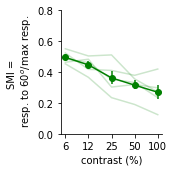

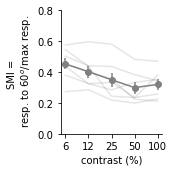

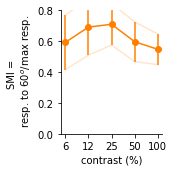

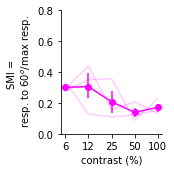

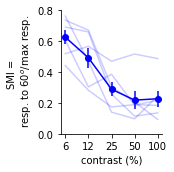

In [674]:
reload(scf)
reload(ut)

self = scf.ca_imaging(rsfile)
exptwise = False
self.compute_smis(exptwise=exptwise, xaxis=self.ucontrast, norm_to_max=norm_to_max, big_ind=-1)

print(self.running_dim)
print(self.celltype_dim)
print(self.alignment_dim)


opt = {}
opt['filebase'] = 'figures/semilogx_%s_smi_by_contrast_%s.pdf'
opt['rsexpt_inds'] = [1, 0]#%(lbls[itype], running_lbls[irun])
# opt['ind_list'] = [[0], [0,1], [0]]
opt['ind_list'] = [[0], None, [0]]

# print(self.running_dim)
# print(self.celltype_dim)
# print(self.alignment_dim)

# if exptwise:|
opt['fn'] = self.plot_smi_vs_contrast_semilogx
# else:
#     opt['fn'] = self.plot_smi_vs_contrast_semilogx_roiwise
opt['attr_args'] = ['smis', 'rsexpt_colors']
opt['add_kwargs'] = {}

scf.fig_gen(opt, self, save=True)
# this_fn = lambda *args: opt['fn'](*args, **opt['add_kwargs'])
# attr_args = [getattr(self,attr) for attr in opt['attr_args']]
# ut.apply_fn_to_nested_lists_no_out(this_fn,opt['ind_list'],*attr_args)

####### If we want to plot just one: ##################
# self.plot_smi_vs_contrast_semilogx(self.smis[1][0][0],self.rsexpt_colors[0][0][0])

In [ ]:
reload(scf)
scf.pc_smimi_bars(self,  mi_type='slope', ylim=True, save=False)

In [ ]:
self.smi_last_ind